In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
trainx = np.array(((0,0),(0,1),(1,0),(1,1)))
trainy = np.array(((0),(0),(0),(1)))

In [3]:
print("Trainx shape: " +str(trainx.shape))
print("Trainy shape: " +str(trainy.shape))

Trainx shape: (4, 2)
Trainy shape: (4,)


In [4]:
trainx = np.transpose(trainx)

trainy = trainy.reshape(trainy.shape[0],1)
trainy = np.transpose(trainy)

print("Trainx shape: " +str(trainx.shape))
print("Trainy shape: " +str(trainy.shape))

Trainx shape: (2, 4)
Trainy shape: (1, 4)


In [0]:
def initWeights(l1,l2,l3):

  w1 = np.random.rand(l2,l1) * 0.999
  b1 = np.zeros((l2,1))

  w2 = np.random.rand(l3,l2) * 0.999
  b2 = np.zeros((l3,1))

  return w1,b1,w2,b2

In [0]:
def sigmoid(z):

  a = 1/(1+np.exp(-z))

  return a

In [0]:
def fwdProp(w1,b1,w2,b2,x,y,i,loss):

  z1 = np.dot(w1,x) + b1
  a1 = np.tanh(z1)

  z2 = np.dot(w2,a1) + b2
  a2 = sigmoid(z2)

  cost = 1/-m*(np.sum(np.multiply(y,np.log(a2)) - np.multiply((1-y),np.log(1-a2))))


  if i%10 == 0:
    print("Cost after iteration "+str(i)+" is: " + str(cost))
    loss.append(cost)

  return z1,a1,z2,a2,loss

In [0]:
def backProp(a2,z2,w1,x,y,m):

  dz2 = a2 - y

  dw2 = 1/m * np.dot(dz2,a1.T)
  db2 = 1/m * np.sum(dz2, axis = 1, keepdims = True)

  dz1 = np.multiply(np.dot(w2.T,dz2), 1-np.power(a1,2))
  
  dw1 = 1/m * np.dot(dz1,x.T)
  db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)

  return dw1,db1,dw2,db2

In [0]:
def learn(w1,w2,b1,b2,dw1,dw2,db1,db2,lr):

  w1 = w1 - lr*dw1
  b1 = b1 - lr*db1
  w2 = w2 - lr*dw2
  b2 = b2 - lr*db2

  return w1,b1,w2,b2

In [0]:
def predict(w1,b1,w2,b2,x):

  z1 = np.dot(w1,x) + b1
  a1 = np.tanh(z1)

  z2 = np.dot(w2,a1) + b2
  a2 = sigmoid(z2)

  return a2

AND gate prediction


Enter the learning rate: 0.75
Enter the number of times the model should learn: 100
Learning...


Cost after iteration 0 is: -0.6624351734695061
Cost after iteration 10 is: -0.8819858889156689
Cost after iteration 20 is: -0.6676900324476329
Cost after iteration 30 is: -0.9428993201247381
Cost after iteration 40 is: -0.6690991999612811
Cost after iteration 50 is: -0.7895957057853352
Cost after iteration 60 is: -0.5990757974476543
Cost after iteration 70 is: -0.6434792208888687
Cost after iteration 80 is: -0.761293561261727
Cost after iteration 90 is: -0.7284192355307095


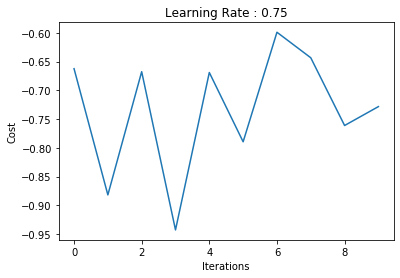

In [30]:
l1 = trainx.shape[0]
l2 = 4
l3 = trainy.shape[0]
m = trainx.shape[1]
loss = []

print("AND gate prediction\n\n")
lr = float(input("Enter the learning rate: "))
iter = int(input("Enter the number of times the model should learn: "))
print("Learning...\n\n")


for i in range(0,iter):
  w1,b1,w2,b2 = initWeights(l1,l2,l3)
  z1,a1,z2,a2,loss = fwdProp(w1,b1,w2,b2,trainx,trainy,i,loss)
  dw1,db1,dw2,db2 = backProp(a2,z2,w1,trainx,trainy,m)
  w1,b1,w2,b2 = learn(w1,w2,b1,b2,dw1,dw2,db1,db2,lr)
  
plt.plot(loss)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.title("Learning Rate : "+str(lr))
plt.show()

In [32]:
x = int(input("Enter the value of x: "))
y = int(input("Enter the value of y: "))

if (x!=0 and x!=1) or (y!=0 and y!=1):
  print("Invalid")

pred = np.array((x,y))

pred = pred.reshape((pred.shape[0],1))
result = predict(w1,b1,w2,b2,pred)

if result>0.5:
  result = 1
else:
  result = 0

print("AND gate output is: "+str(result))

Enter the value of x: 0
Enter the value of y: 1
AND gate output is: 0
